In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
from IPython import get_ipython

data=                 ImageID    Feature1    Feature2    Feature3    Feature4  \
0    ID_0225_Z_0069.tif  22806.9700  33862.4700   4008.2222 -3042.86910   
1    ID_0239_Z_0365.tif  62977.0160  -3069.1165 -10363.8320  -897.17444   
2    ID_0183_Z_0242.tif -57072.2770 -23612.3140   5810.6313   790.34534   
3    ID_0252_Z_0064.tif  56266.6760 -45207.9000 -12093.9700  1998.05960   
4    ID_0105_Z_0240.tif  -5434.1320  64001.4530    845.2219  1343.97440   
..                  ...         ...         ...         ...         ...   
262  ID_0098_Z_0068.tif  63186.0430   6693.7437   3753.8953   822.04830   
263  ID_0048_Z_0294.tif   1791.5504  73824.3600  -2654.8657  4178.34960   
264  ID_0121_Z_0245.tif  53874.5230    705.5072  15059.1740  -280.07455   
265  ID_0039_Z_0112.tif  34287.7460  42410.8100 -10133.9230  1235.29680   
266  ID_0220_Z_0066.tif -52203.7970 -30489.8750 -15717.6570  1856.48280   

       Feature5    Feature6  ReconstructionError  
0   -1806.03160   295.29718            255

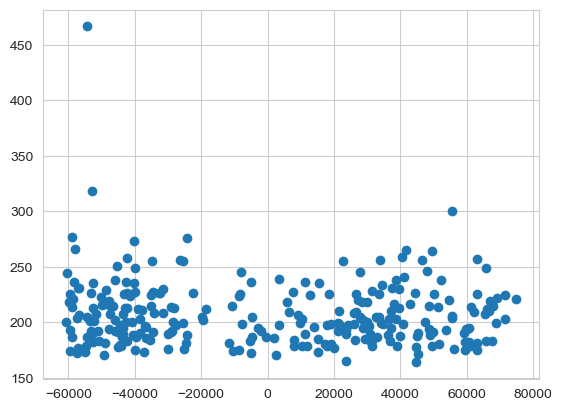

In [2]:
sns.set_style("whitegrid")
np.random.seed(697)
data_0 = pd.read_csv("pca_all_features_stats.csv", header = 0)
print('data=', data_0)
plt.scatter(data_0['Feature1'], data_0['ReconstructionError'])
plt.show()

data 2=        Feature1    Feature2    Feature3    Feature4    Feature5    Feature6  \
0    22806.9700  33862.4700   4008.2222 -3042.86910 -1806.03160   295.29718   
1    62977.0160  -3069.1165 -10363.8320  -897.17444    92.47459  1705.81960   
2   -57072.2770 -23612.3140   5810.6313   790.34534  1101.90420   475.94913   
3    56266.6760 -45207.9000 -12093.9700  1998.05960 -2058.15400 -1858.82840   
4    -5434.1320  64001.4530    845.2219  1343.97440 -1245.45690 -1720.42400   
..          ...         ...         ...         ...         ...         ...   
262  63186.0430   6693.7437   3753.8953   822.04830  1884.00220  1496.53190   
263   1791.5504  73824.3600  -2654.8657  4178.34960 -1082.50210 -3320.67900   
264  53874.5230    705.5072  15059.1740  -280.07455 -1502.38060  2600.26860   
265  34287.7460  42410.8100 -10133.9230  1235.29680 -1118.22910  -216.43665   
266 -52203.7970 -30489.8750 -15717.6570  1856.48280  1050.13960  -711.39580   

     ReconstructionError  
0              2

C:\Users\MouadKHAZNAOUI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MouadKHAZNAOUI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\MouadKHAZNAOUI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\MouadKHAZNAOUI\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You c

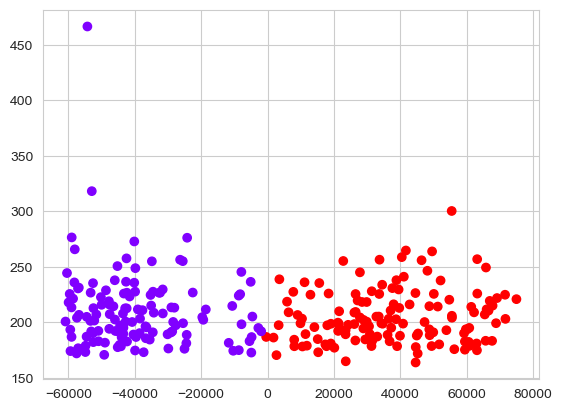

data 3=        Feature1    Feature2    Feature3    Feature4    Feature5    Feature6  \
0    22806.9700  33862.4700   4008.2222 -3042.86910 -1806.03160   295.29718   
1    62977.0160  -3069.1165 -10363.8320  -897.17444    92.47459  1705.81960   
2   -57072.2770 -23612.3140   5810.6313   790.34534  1101.90420   475.94913   
3    56266.6760 -45207.9000 -12093.9700  1998.05960 -2058.15400 -1858.82840   
4    -5434.1320  64001.4530    845.2219  1343.97440 -1245.45690 -1720.42400   
..          ...         ...         ...         ...         ...         ...   
262  63186.0430   6693.7437   3753.8953   822.04830  1884.00220  1496.53190   
263   1791.5504  73824.3600  -2654.8657  4178.34960 -1082.50210 -3320.67900   
264  53874.5230    705.5072  15059.1740  -280.07455 -1502.38060  2600.26860   
265  34287.7460  42410.8100 -10133.9230  1235.29680 -1118.22910  -216.43665   
266 -52203.7970 -30489.8750 -15717.6570  1856.48280  1050.13960  -711.39580   

     ReconstructionError  
0              2

In [3]:
data_0 = data_0.drop(['ImageID'], axis = 1)
print('data 2=', data_0)
x=data_0.copy()
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2)
kmeans.fit(x)
#kmeans(algorithm='auto',copy_x=True, init='K-means++', max_iter=300,
  #     n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto')
clusters=x.copy()
clusters['cluster_pred']= kmeans.fit_predict(x)
plt.scatter(clusters['Feature1'], clusters['ReconstructionError'], 
            c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel=['Feature1']
plt.ylabel=['ReconstructionError']
plt.show()

print('data 3=', data_0)

print(data_0.ReconstructionError.value_counts())

In [4]:
print(data_0)

features = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5', 'Feature5']

data = pd.get_dummies(data_0, columns = features)

print(data)
    
#Split in 75% train and 25% test set
X, y = train_test_split(data, test_size = 0.25, random_state= 1984)

#Make sure labels are equally distributed in train and test set
#X.ReconstructionError.sum()/X.shape[0]
#y.ReconstructionError.sum()/y.shape[0] 

#Get the data ready for the Neural Network
training_y = X['ReconstructionError']
testing_y = y['ReconstructionError']

training_y_b = np.where(training_y > 245, 1, 0) #Turn probability to 0-1 binary output
testing_y_b = np.where(testing_y > 245, 1, 0) #Turn probability to 0-1 binary output


# Drop 'ReconstructionError' from features
training_x = X.drop(['ReconstructionError'], axis=1)
testing_x = y.drop(['ReconstructionError'], axis=1)


# Convert features and labels to numpy arrays
training_x = np.array(training_x)
testing_x = np.array(testing_x)

training_y = np.array(training_y)
testing_y = np.array(testing_y)

       Feature1    Feature2    Feature3    Feature4    Feature5    Feature6  \
0    22806.9700  33862.4700   4008.2222 -3042.86910 -1806.03160   295.29718   
1    62977.0160  -3069.1165 -10363.8320  -897.17444    92.47459  1705.81960   
2   -57072.2770 -23612.3140   5810.6313   790.34534  1101.90420   475.94913   
3    56266.6760 -45207.9000 -12093.9700  1998.05960 -2058.15400 -1858.82840   
4    -5434.1320  64001.4530    845.2219  1343.97440 -1245.45690 -1720.42400   
..          ...         ...         ...         ...         ...         ...   
262  63186.0430   6693.7437   3753.8953   822.04830  1884.00220  1496.53190   
263   1791.5504  73824.3600  -2654.8657  4178.34960 -1082.50210 -3320.67900   
264  53874.5230    705.5072  15059.1740  -280.07455 -1502.38060  2600.26860   
265  34287.7460  42410.8100 -10133.9230  1235.29680 -1118.22910  -216.43665   
266 -52203.7970 -30489.8750 -15717.6570  1856.48280  1050.13960  -711.39580   

     ReconstructionError  
0              255.25089

In [260]:
print('Building Neural Network model...')
adam = optimizers.Adam(learning_rate = 0.005)

model = Sequential()
model.add(Dense(48, input_dim=training_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24,
                #kernel_regularizer=regularizers.l2(0.02),
                activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

Building Neural Network model...


Epoch 1/3
5/5 [==============================] - 0s 35ms/step - loss: 0.7403 - val_loss: 0.8879
Epoch 2/3
5/5 [==============================] - 0s 18ms/step - loss: 0.6877 - val_loss: 0.9475
Epoch 3/3
5/5 [==============================] - 0s 19ms/step - loss: 0.7345 - val_loss: 0.9795


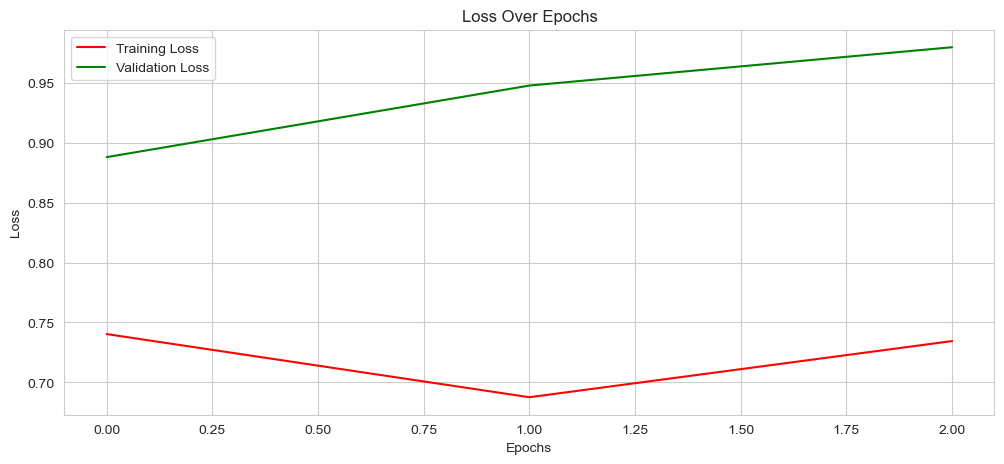

In [128]:
history = model.fit(training_x, training_y_b, validation_split=0.2, epochs=3, batch_size=64)
print(history.history.keys())
history.history.keys()

# Affichage de la précision et de la perte au fil des époques
fig, ax = plt.subplots(figsize=(12, 5))

# Perte
ax.plot(history.history['loss'], label='Training Loss', color='red')
ax.plot(history.history['val_loss'], label='Validation Loss', color='green')
ax.set_title('Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()


Après équilibrage des classes :
Nombre d'instances de la classe majoritaire (0) : 184
Nombre d'instances de la classe minoritaire (1) : 184
Building Neural Network model...
Epoch 1/3
5/5 [==============================] - 1s 63ms/step - loss: 0.7837 - val_loss: 1.0497
Epoch 2/3
5/5 [==============================] - 0s 14ms/step - loss: 0.7506 - val_loss: 1.1453
Epoch 3/3
5/5 [==============================] - 0s 12ms/step - loss: 0.7352 - val_loss: 1.1279
dict_keys(['loss', 'val_loss'])


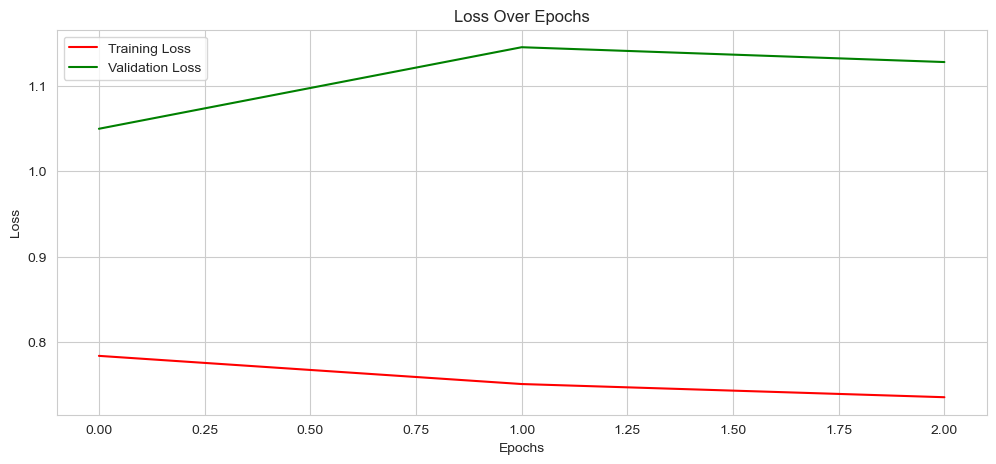

In [30]:
from imblearn.over_sampling import SMOTE

# Utiliser SMOTE pour équilibrer les classes
smote = SMOTE(random_state=42)
training_x_resampled, training_y_resampled = smote.fit_resample(training_x, training_y_b)

print("Après équilibrage des classes :")
print("Nombre d'instances de la classe majoritaire (0) :", sum(training_y_resampled == 0))
print("Nombre d'instances de la classe minoritaire (1) :", sum(training_y_resampled == 1))

# Construire votre modèle avec les données équilibrées
print('Building Neural Network model...')
adam = optimizers.Adam(learning_rate = 0.001)

model = Sequential()
model.add(Dense(48, input_dim=training_x_resampled.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(24,
                #kernel_regularizer=regularizers.l2(0.02),
                activation="tanh"))
model.add(Dropout(0.3))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer='adam')

history = model.fit(training_x_resampled, training_y_resampled, validation_split=0.2, epochs=3, batch_size=64)
print(history.history.keys())
history.history.keys()

# Affichage de la précision et de la perte au fil des époques
fig, ax = plt.subplots(figsize=(12, 5))

# Perte
ax.plot(history.history['loss'], label='Training Loss', color='red')
ax.plot(history.history['val_loss'], label='Validation Loss', color='green')
ax.set_title('Loss Over Epochs')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()

plt.show()

In [31]:
#Predict on test set
predictions_NN_prob = model.predict(testing_x)

predictions_NN_prob = predictions_NN_prob[:,0]

predictions_NN_01 = np.where(predictions_NN_prob > 0.35, 1, 0) #Turn probability to 0-1 binary output

3/3 [==============================] - 0s 3ms/step


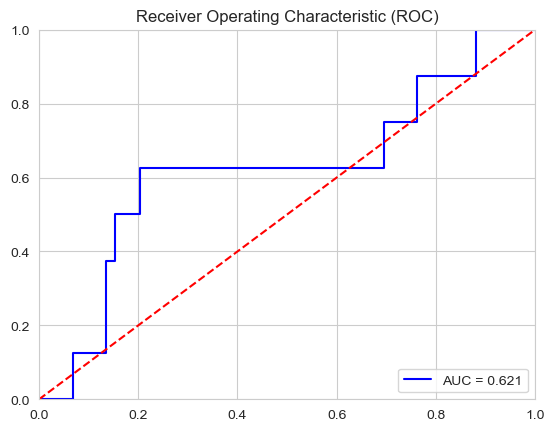

In [32]:
# Calculer la courbe ROC avec les étiquettes binaires
false_positive_rate, recall, thresholds = roc_curve(testing_y_b, predictions_NN_prob)
roc_auc = auc(false_positive_rate, recall)
plt.figure()
plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.show()

Accuracy: 0.8208955223880597


TypeError: 'list' object is not callable

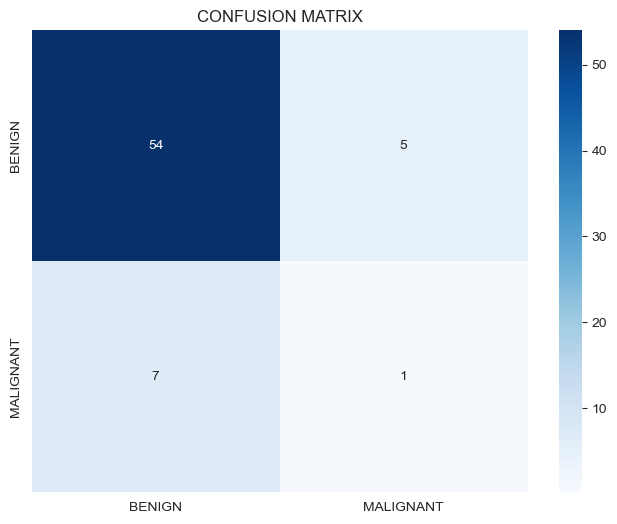

In [34]:
from sklearn.metrics import classification_report

# Calcul de l'exactitude
accuracy = accuracy_score(testing_y_b, predictions_NN_01)
print("Accuracy:", accuracy)

# Print Classification Report
# print(classification_report(testing_y_b, predictions_NN_01))

#Print Confusion Matrix
cm = confusion_matrix(testing_y_b, predictions_NN_01)
labels = ['BENIGN', 'MALIGNANT']
plt.figure(figsize=(8,6))
sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('CONFUSION MATRIX')
plt.ylabel('TRUE CLASS')
plt.xlabel('PREDICTED CLASS')
plt.show()